In [18]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Load dats
wnut_resuls = pd.read_csv("./wnut17_roberta-base_stratified_samples.tsv", delimiter="\t").drop(columns=["iteration", "seed"])
# wikiann_d= pd.read_csv("./germanler_gottbert_base_last_stratified_samples.tsv", delimiter="\t").drop(columns=["iteration", "seed"])

# Group data by model, aug_strategy, ratio
avg_wnut_results = wnut_resuls.groupby(["model_name", "aug_strategy", "ratio"]).mean().reset_index()
# avg_germanler_results = germanler_results.groupby(["model_name", "aug_strategy", "ratio"]).mean().reset_index()

In [20]:
no_augmentation_f1 = avg_wnut_results.loc[avg_wnut_results.aug_strategy == "no_augmentation"]["f1"].iloc[0]
avg_wnut_results.pivot(index="ratio", columns="aug_strategy", values="f1").fillna(no_augmentation_f1).drop(columns="no_augmentation")


aug_strategy,all,delete_character,reverse_letter_case,substitute_character,swap_characters
ratio,,,,,
0.0,0.567335,0.567335,0.567335,0.567335,0.567335
0.1,0.578567,0.569483,0.572247,0.573824,0.573177
0.3,0.558096,0.573864,0.576574,0.572630,0.570816
0.5,0.543565,0.574077,0.569103,0.577760,0.571685
0.7,0.537234,0.573732,0.577722,0.575001,0.575762
0.9,0.542543,0.578894,0.576825,0.576947,0.576332
1.0,0.548881,0.577373,0.563213,0.574200,0.577290


In [21]:
no_augmentation_re = avg_wnut_results.loc[avg_wnut_results.aug_strategy == "no_augmentation"]["recall"].iloc[0]
avg_wnut_results.pivot(index="ratio", columns="aug_strategy", values="recall").fillna(no_augmentation_re).drop(columns="no_augmentation")


aug_strategy,all,delete_character,reverse_letter_case,substitute_character,swap_characters
ratio,,,,,
0.0,0.506024,0.506024,0.506024,0.506024,0.506024
0.1,0.526969,0.524930,0.529935,0.521038,0.521038
0.3,0.557739,0.516960,0.528267,0.516960,0.520667
0.5,0.565338,0.526413,0.544764,0.534013,0.527155
0.7,0.555885,0.532530,0.548285,0.545320,0.537905
0.9,0.565709,0.546988,0.554217,0.543466,0.543095
1.0,0.554402,0.548656,0.554217,0.548100,0.541983


In [22]:
no_augmentation_pr = avg_wnut_results.loc[avg_wnut_results.aug_strategy == "no_augmentation"]["precision"].iloc[0]
avg_wnut_results.pivot(index="ratio", columns="aug_strategy", values="precision").fillna(no_augmentation_pr).drop(columns="no_augmentation")


aug_strategy,all,delete_character,reverse_letter_case,substitute_character,swap_characters
ratio,,,,,
0.0,0.646597,0.646597,0.646597,0.646597,0.646597
0.1,0.641591,0.624106,0.622699,0.639052,0.637148
0.3,0.559297,0.645029,0.634731,0.641899,0.632000
0.5,0.523848,0.631469,0.598039,0.629552,0.625033
0.7,0.521808,0.622520,0.610672,0.608724,0.619563
0.9,0.521512,0.615002,0.601531,0.615062,0.615073
1.0,0.544136,0.609809,0.572958,0.603772,0.617611


In [23]:
#no_augmentation_germanler = avg_germanler_results.loc[avg_germanler_results.aug_strategy == "no_augmentation"]["f1"].iloc[0]
#avg_germanler_results.pivot(index="ratio", columns="aug_strategy", values="f1").fillna(no_augmentation_germanler).drop(columns="no_augmentation")

In [ ]:
# Plot results with seaborn and matplotlib
def plot(inp_data,x,y,hue="aug_strategy", ):
    no_augmentation = inp_data.loc[inp_data.aug_strategy == "no_augmentation"][y].iloc[0]
    data = inp_data.loc[inp_data.aug_strategy != "no_augmentation"]
    fig, ax = plt.subplots(figsize=(8,6), dpi=100)
    sns.set_style()
    sns.lineplot(data=data, x=x, y=y, hue=hue, marker="o")
    ax.axhline(y=no_augmentation, color="grey", linestyle="--", label="no_augmentation")

    plt.ylabel(y.upper())
    plt.xlabel("Ratio of training samples for augmentation")
    ax.legend(loc="upper right", bbox_to_anchor=(1.35, 1))
    


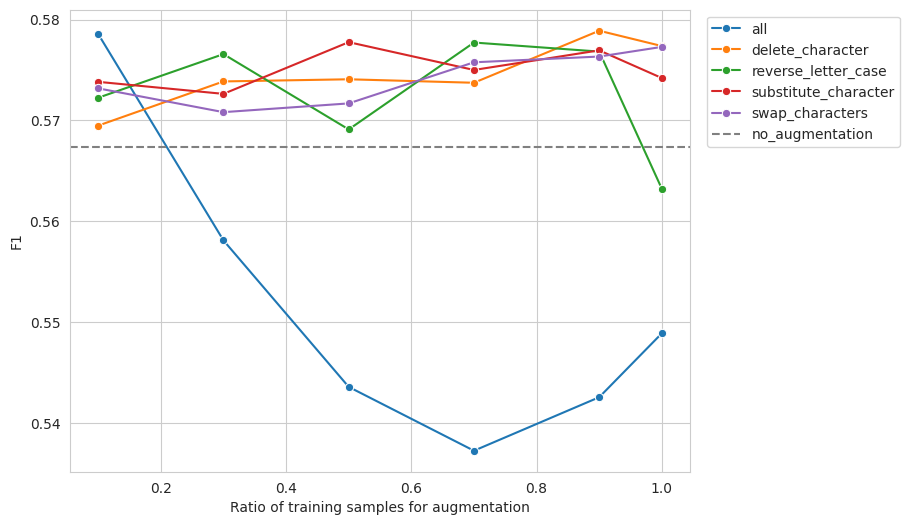

In [38]:
# Plot stratified results
plot(avg_wnut_results, x="ratio", y="f1")

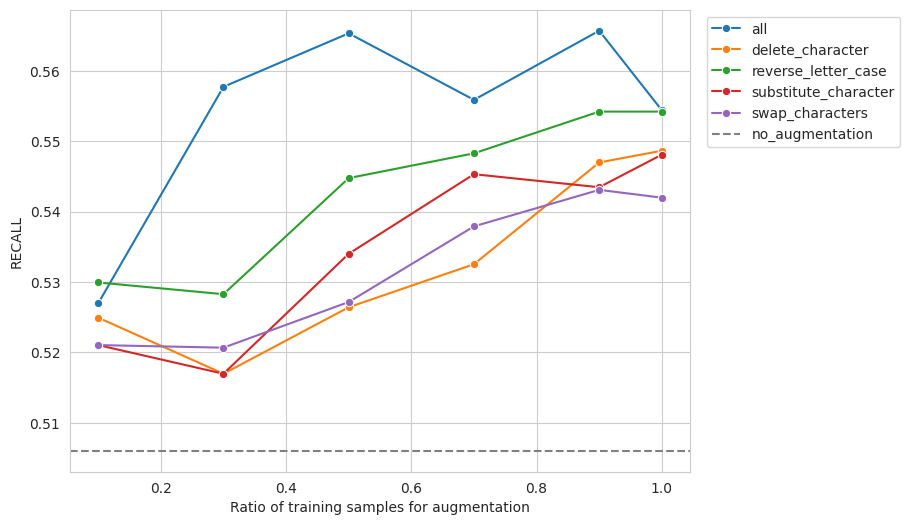

In [29]:
# Plot stratified results
plot(avg_wnut_results, x="ratio", y="recall")

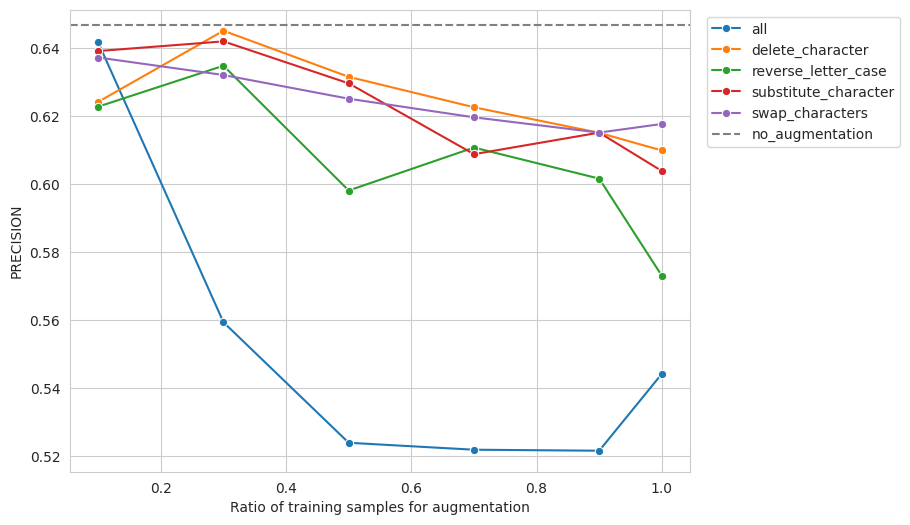

In [30]:
# Plot random samples results
plot(avg_wnut_results, x="ratio", y="precision")